<a href="https://colab.research.google.com/github/ilafmakke/lineare_polynomial-regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Load the Airbnb listings data
uploaded=files.upload()
# Get the list of uploaded filenames
uploaded_filenames = list(uploaded.keys())
import pandas as pd
# Print the list of filenames
print(uploaded_filenames)
uploaded_csv_content = uploaded[uploaded_filenames[0]]
# Prompt user for file path
filename = uploaded_filenames[0]
df = pd.read_csv(filename)
# Display basic information about the dataset
print(df.info())

Saving data.csv to data.csv
['data.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   days    20 non-null     int64
 1   length  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes
None


In [3]:
df

,days,length
0,1,0
1,5,1
2,14,2
3,22,5
4,44,29
5,55,300
6,72,175
7,77,200
8,85,290
9,97,400


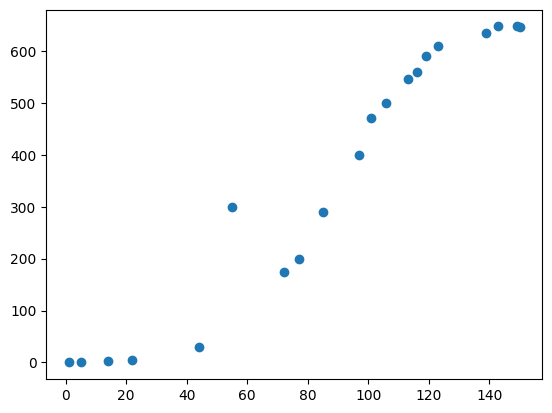

In [4]:
plt.scatter(df['days'],df['length'])

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression()

In [9]:
df['days']

0       1
1       5
2      14
3      22
4      44
5      55
6      72
7      77
8      85
9      97
10    101
11    106
12    113
13    116
14    119
15    123
16    139
17    143
18    149
19    150
Name: days, dtype: int64

In [8]:
x=df['days'].values.reshape(-1,1) #When you use -1 in the reshape function,
#it allows NumPy to automatically calculate the dimension based on the length of the array
# and the other specified dimension.
x

array([[  1],
       [  5],
       [ 14],
       [ 22],
       [ 44],
       [ 55],
       [ 72],
       [ 77],
       [ 85],
       [ 97],
       [101],
       [106],
       [113],
       [116],
       [119],
       [123],
       [139],
       [143],
       [149],
       [150]])

In [10]:
y=df['length']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([5.06488823])

In [ ]:
lr.intercept_

-75.81607634118518

In [ ]:
predic=lr.predict(x_test)
predic

array([705.37054416, -70.77016133, 710.76041017, 360.4191195 ,
       446.65697566, 673.0313481 ])

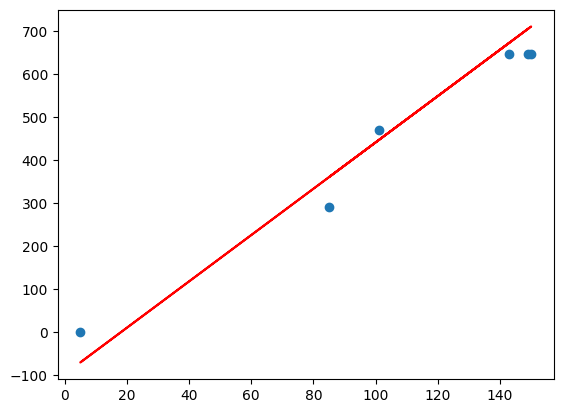

In [ ]:
plt.scatter(x_test,y_test)
plt.plot (x_test,predic,color='red')

In [ ]:
from IPython.core import error
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
mean_squared_error(y_test,predic)

3155.561244864821

In [ ]:
#precission value
r2_score(y_test,predic)

0.944902653536223

In [ ]:
#error distanc between the exact value and the predicted
mean_absolute_error(y_test,predic)

52.44910126697659

polynomial feature # New Section

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [ ]:
from numpy.lib import polynomial
poly=PolynomialFeatures(degree=3)
x=df['days'].values.reshape(-1,1)
y=df['length']
x_poly=poly.fit_transform(x)
x_poly

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02],
       [1.000000e+00, 1.400000e+01, 1.960000e+02, 2.744000e+03],
       [1.000000e+00, 2.200000e+01, 4.840000e+02, 1.064800e+04],
       [1.000000e+00, 4.400000e+01, 1.936000e+03, 8.518400e+04],
       [1.000000e+00, 5.500000e+01, 3.025000e+03, 1.663750e+05],
       [1.000000e+00, 7.200000e+01, 5.184000e+03, 3.732480e+05],
       [1.000000e+00, 7.700000e+01, 5.929000e+03, 4.565330e+05],
       [1.000000e+00, 8.500000e+01, 7.225000e+03, 6.141250e+05],
       [1.000000e+00, 9.700000e+01, 9.409000e+03, 9.126730e+05],
       [1.000000e+00, 1.010000e+02, 1.020100e+04, 1.030301e+06],
       [1.000000e+00, 1.060000e+02, 1.123600e+04, 1.191016e+06],
       [1.000000e+00, 1.130000e+02, 1.276900e+04, 1.442897e+06],
       [1.000000e+00, 1.160000e+02, 1.345600e+04, 1.560896e+06],
       [1.000000e+00, 1.190000e+02, 1.416100e+04, 1.685159e+06],
       [1.000000e+00, 1.2

In [ ]:
lr_poly=LinearRegression()

In [ ]:
t=lr_poly.fit(x_poly,y)
t
preds_poly=lr_poly.predict(x_poly)
print("after poly",r2_score(y,preds_poly))
print("befor poly",r2_score(y,predic))


after poly 0.9615895128581089


ValueError: ignored

ValueError: ignored

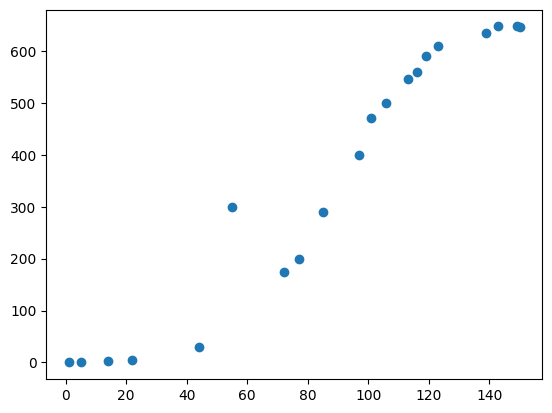

In [ ]:
plt.scatter(x,y)
plt.plot(x, predic,color='red')
plt.plot(x,preds_poly, color='green' )

In [ ]:
x=df['days'].values.reshape(-1,1)
y=df['length']

after poly 0.935113410531823
befor poly 0.935113410531823
degre= 1


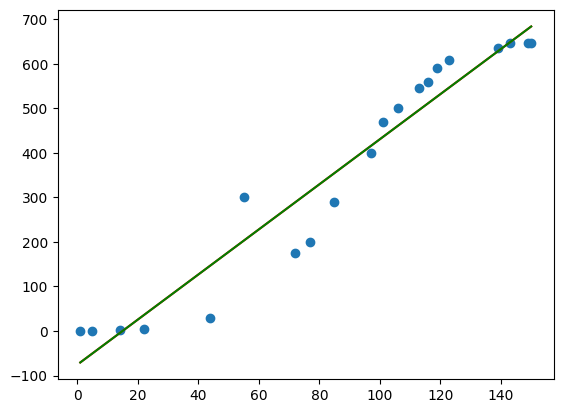

after poly 0.9388226557883499
befor poly 0.935113410531823
degre= 2


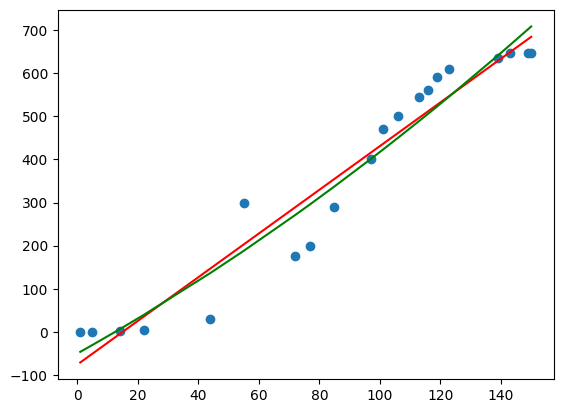

after poly 0.9615895128581089
befor poly 0.935113410531823
degre= 3


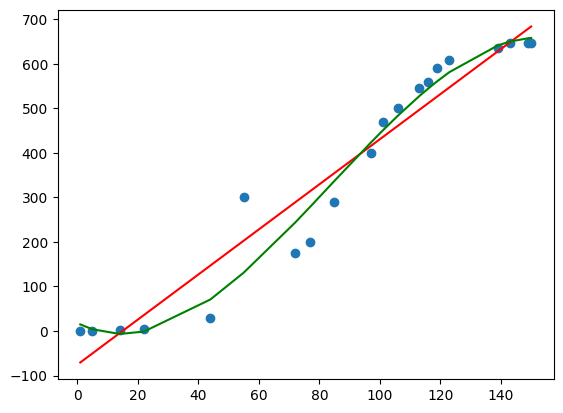

after poly 0.9659836113809932
befor poly 0.935113410531823
degre= 4


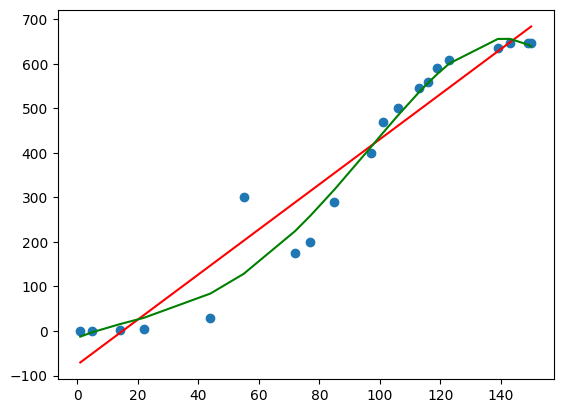

after poly 0.9671327477817062
befor poly 0.935113410531823
degre= 5


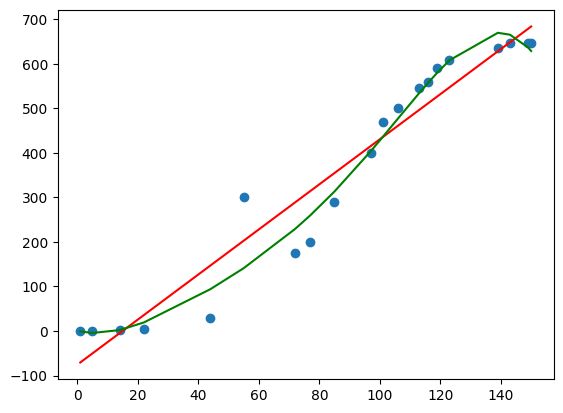

after poly 0.9708247001012046
befor poly 0.935113410531823
degre= 6


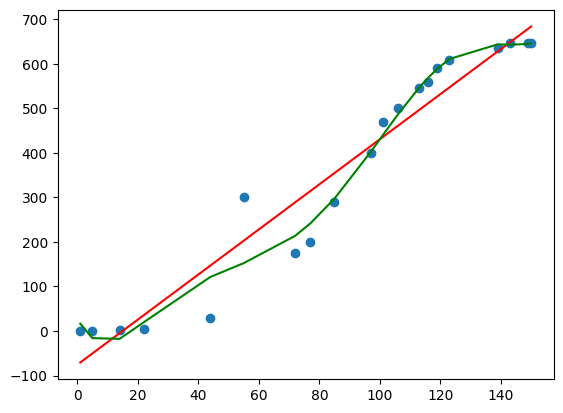

after poly 0.9729706849249837
befor poly 0.935113410531823
degre= 7


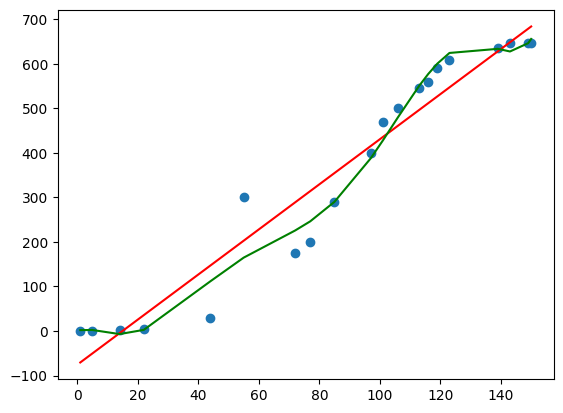

after poly 0.976296248675844
befor poly 0.935113410531823
degre= 8


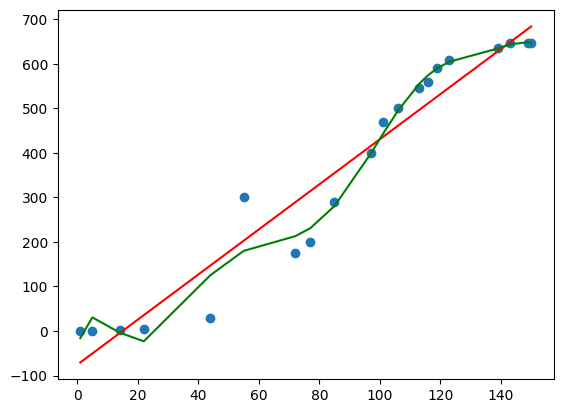

after poly 0.9802380482379995
befor poly 0.935113410531823
degre= 9


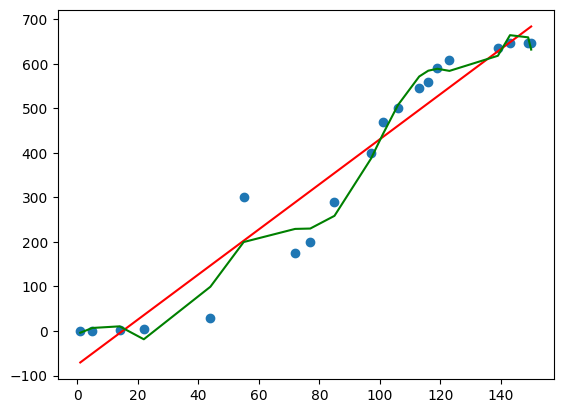

after poly 0.986382694151259
befor poly 0.935113410531823
degre= 10


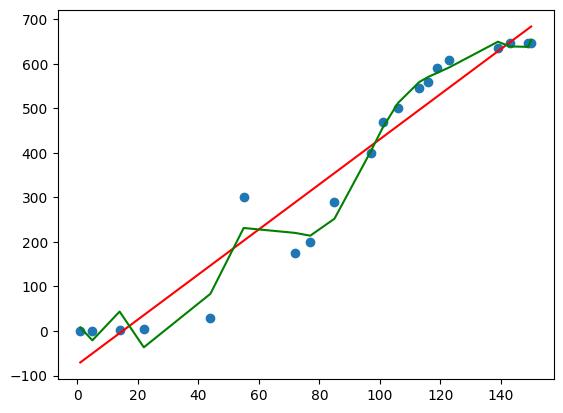

after poly 0.9865379786904971
befor poly 0.935113410531823
degre= 11


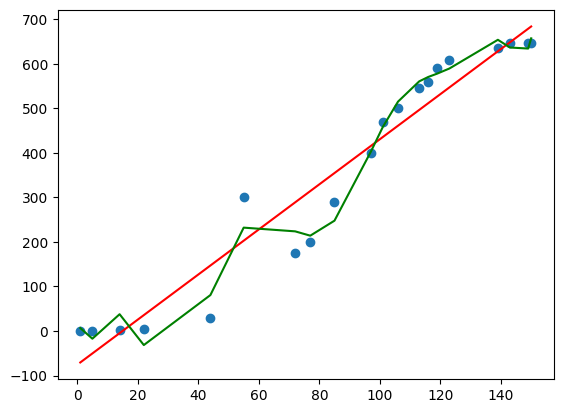

after poly 0.995057944098443
befor poly 0.935113410531823
degre= 12


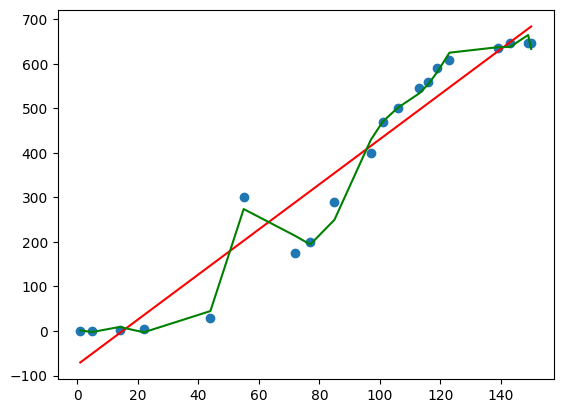

after poly 0.9987417031286828
befor poly 0.935113410531823
degre= 13


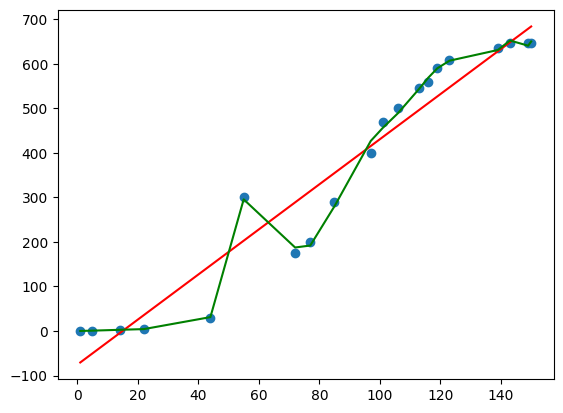

after poly 0.9992356223618872
befor poly 0.935113410531823
degre= 14


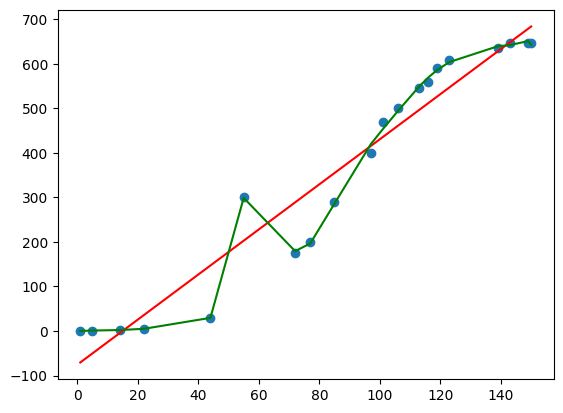

after poly 0.9995869041188791
befor poly 0.935113410531823
degre= 15


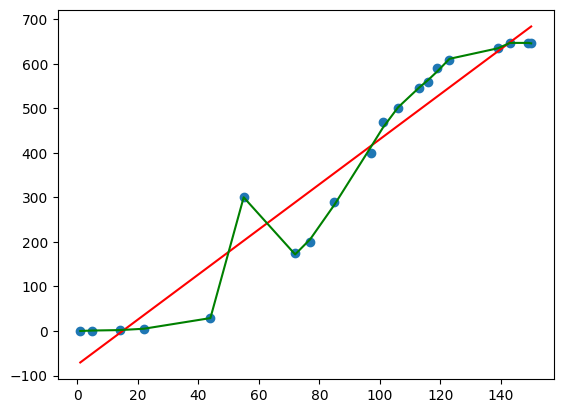

after poly 0.9996042517311801
befor poly 0.935113410531823
degre= 16


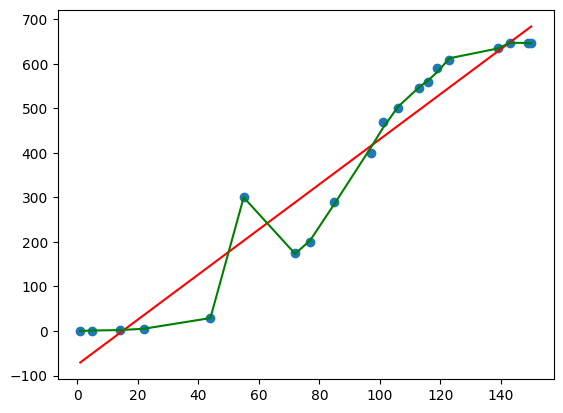

after poly 0.9998414252320578
befor poly 0.935113410531823
degre= 17


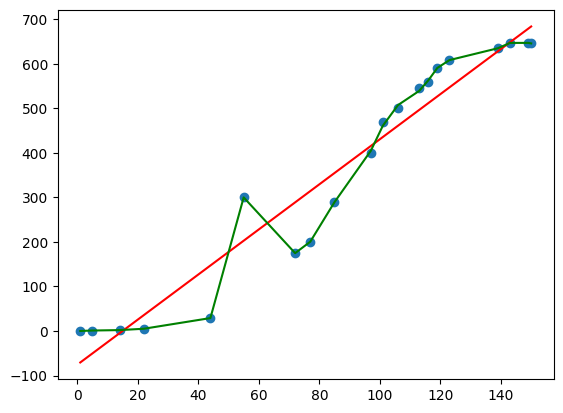

after poly 0.9998342386575413
befor poly 0.935113410531823
degre= 18


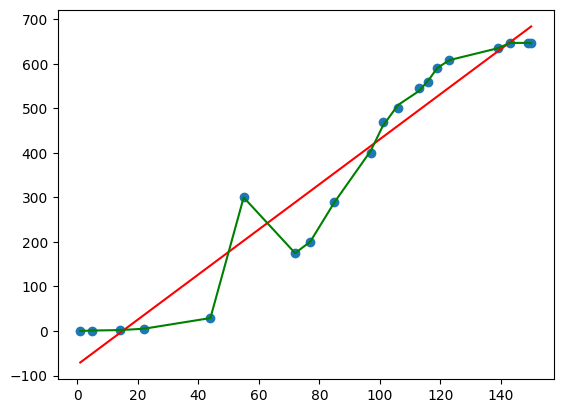

after poly 0.9999256726478629
befor poly 0.935113410531823
degre= 19


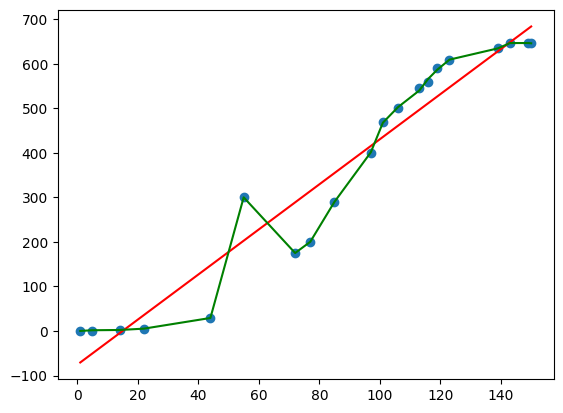

In [ ]:
for  d in range(1,20):
  poly=PolynomialFeatures(degree=d)
  x_poly=poly.fit_transform(x)
  scl=StandardScaler()
  x_scl=scl.fit_transform(x_poly)
  lr_poly=LinearRegression()
  lr_poly.fit(x_scl,y)
  preds_poly=lr_poly.predict(x_scl)
  print("after poly",r2_score(y,preds_poly))
  print("befor poly",r2_score(y,predic))
  print("degre=",d)
  plt.scatter(x,y)
  plt.plot(x, predic,color='red')
  plt.plot(x,preds_poly, color='green' )
  plt.show()

*italicized text*# in this section we work in insurance.csv

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Load the Airbnb listings data
uploaded=files.upload()
# Get the list of uploaded filenames
uploaded_filenames = list(uploaded.keys())
import pandas as pd
# Print the list of filenames
print(uploaded_filenames)
uploaded_csv_content = uploaded[uploaded_filenames[0]]
# Prompt user for file path
filename = uploaded_filenames[0]
df = pd.read_csv(filename)
# Display basic information about the dataset
print(df.info())

Saving insurance.csv to insurance (3).csv
['insurance (3).csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [ ]:
#transform all categorical data into nemreical in one step
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55
1334,18,0,31.9,0,0,northeast,2205.98
1335,18,0,36.9,0,0,southeast,1629.83
1336,21,0,25.8,0,0,southwest,2007.95


In [ ]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,1,0,0
1334,18,0,31.9,0,0,2205.98,0,0,0
1335,18,0,36.9,0,0,1629.83,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,1


*using the initial insurance data set we try to decompose the data set into traning and testing
and compare with initial x and  polynomial data

In [ ]:
x=df.iloc[:, :-1]
y=df['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
train_preds=lr.predict(x_train)
test_preds=lr.predict(x_test)
print("after poly",r2_score(y_train,train_preds))
print("befor poly",r2_score(y_test,test_preds))

after poly 1.0
befor poly 1.0
